### **Problem Statement Overview:**

- This Project is based on the resarch paper "https://arxiv.org/pdf/1906.00080.pdf" with the same name "Gmail Smart Compose: Real-Time Assisted Writing".
- This paper discuss, how we can assist Users with suggetions while writing email. Recommend them sentences, that they might want to write based on the words user already wrote.
- Here's how Smart Compose works: As you type, the feature uses ML Algorithm to analyze the words and phrases you've already written and make suggestions for the next words or phrases you might want to use. Example, if you type "please find " Smart Compose might suggest "the document given below." 
- This will save the Users time and help them compose emails more efficiently.
- This will also help users to avoid repetative typing.

### **Data Overview:** 
- The DataSet We'll be using to solve this problem is "Enron Email Dataset" which can be downloaded from https://www.cs.cmu.edu/~enron/.
- You'll get .tar.gz file which is of size 422mb, after extracting you'll get .tar file and after extracting .tar file we get the folder which contains email data. Size of the Data folder after extraction will occupy 1.32Gb of your space.
- This DataSet contains Email Conversations of about 150 users in text files, mostly senior management of Enron, organized into folders.
- This dataset contains professional emails. So after training our model, next words recommended will be in professional languagey.


### 1. Imorting Data

**EARLY OBSERVATIONS:**
- Extracted Folder contsins Data of 150 Users
- Folder od each user Contains 15+ subfolders which cantains different types of data


In [82]:
import os
import email # to preprocess email faster 
from prettytable import PrettyTable
from tqdm import tqdm
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data is stored into subfolders

In [2]:
path = os.getcwd()+'\\DATA\maildir\\allen-p'
print('*'*40)
print('Folder Names for the User allen-p')
print('*'*40)
for fileName in os.listdir(path):
    print(fileName)

****************************************
Folder Names for the User allen-p
****************************************
all_documents
contacts
deleted_items
discussion_threads
inbox
notes_inbox
sent
sent_items
straw
_sent_mail


- Like User 'allen-p', there are other 149 users. 
- Each with different Folder Names and different Folder Counts

Check Below table for more information

In [8]:
path = os.getcwd()+'\\DATA\maildir\\'
NameOfUser,FolderCount,FileCount = [],[],[]
foldCnt=0;fileCnt=0
for UserName in os.listdir(path):
    foldCnt = 0
    fileCnt=0
    NewPath = str(path)+'\\'+str(UserName)
    for foldName in os.listdir(NewPath):
        foldCnt += 1
        NewPath2 = str(path)+str(UserName)+'\\'+str(foldName)
        for fileName in os.listdir(NewPath2):
            fileCnt+=1
    NameOfUser.append(str(UserName))
    FolderCount.append(foldCnt)
    FileCount.append(fileCnt)

UsersTable = PrettyTable(["User Name", "Folder Count", "File Count"])

for i,j,k in zip(NameOfUser,FolderCount,FileCount):
    UsersTable.add_row([i,j,k])
    
print(UsersTable)

+-----------------+--------------+------------+
|    User Name    | Folder Count | File Count |
+-----------------+--------------+------------+
|     allen-p     |      10      |    3034    |
|     arnold-j    |      46      |    4898    |
|     arora-h     |      11      |    582     |
|     badeer-r    |      16      |    877     |
|     bailey-s    |      5       |    478     |
|      bass-e     |      14      |    7817    |
|    baughman-d   |      15      |    1827    |
|      beck-s     |     114      |   11642    |
|     benson-r    |      9       |    752     |
|     blair-l     |      68      |    3376    |
|    brawner-s    |      13      |    1026    |
|      buy-r      |      15      |    2429    |
|    campbell-l   |      53      |    6490    |
|     carson-m    |      12      |    1400    |
|      cash-m     |      29      |    2927    |
|   causholli-m   |      4       |    943     |
|     corman-s    |      11      |    1340    |
|    crandell-s   |      5       |    49

In [5]:
print(len(NameOfUser))
print(sum(FolderCount))
print(sum(FileCount))
print(min(FolderCount))
print(max(FolderCount))
print(min(FileCount))
print(max(FileCount))

150
2799
491331
1
187
8
28229


### **Observation:**

From the above table,
- Total Users : 150
- Total Folders : 2799
- Total Files/Emails : 491331
- Minimum Number of Folders for any user is 1
- Maximum Number of Folder for any user are 187 
- Minimum Number of Email for any user are 8
- Maximum Number of Email for any user are 28229

### **Getting Body of the email from each file and Saving it as CSV**

In [134]:
#Saving Emails in CSV File
'''
root = os.getcwd()+'\\DATA\maildir\\'
emailData = []
for path, subdirs, files in tqdm(os.walk(root)):
    for name in files:
        finalPsth = os.path.join(path, name)
        try:
            with open(finalPsth,"r") as f:
                file = f.read()
            emailData.append(file)
        except:
            pass

EmailData = pd.DataFrame({'Email':emailData})
EmailData.to_pickle('EmailData.pkl')
'''

3500it [34:43,  1.68it/s]


TypeError: to_pickle() got an unexpected keyword argument 'index'

In [137]:
EmailData = pd.read_pickle('EmailData.pkl')
EmailData.head()

,Email
0,Message-ID: <7452188.1075855667684.JavaMail.ev...
1,Message-ID: <23790115.1075855667708.JavaMail.e...
2,Message-ID: <5860470.1075855667730.JavaMail.ev...
3,Message-ID: <14670081.1075855667751.JavaMail.e...
4,Message-ID: <2101427.1075855667773.JavaMail.ev...


In [138]:
#Sample Mail: 
print(EmailData.iloc[18,0])

Message-ID: <16687116.1075855668071.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 05:07:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Gas Physical/Financial Position
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\All documents
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
12:07 PM ---------------------------
   
	
	
	From:  Cindy Cicchetti                           09/26/2000 09:23 AM
	

To: Phillip K Allen/HOU/ECT@ECT, Hunter S Shively/HOU/ECT@ECT, Scott 
Mills/HOU/ECT@ECT, Allan Severude/HOU/ECT@ECT, Russ Severson/HOU/ECT@ECT, 
Fletcher J Sturm/HOU/ECT@ECT, Scott Neal/HOU/ECT@ECT
cc:  
Subject: Gas Physical/Financial Position

I have scheduled and entered on each of your calendars a meeting for the 
above referenced topic.  It will take

### Observations:
- We can get the body of the Email Using email.message_from_string(file).get_payload()
- Date seems like a good field for analysis.
- As at different period of day, like in Morning you can have conversations about task of the day and in evening it would be about acheived goals in that day.
- In different seasons, way of conversations might change. So we can extract more information using Date
- Subject of the email can also help for suggetion So we can extract them

In [139]:
EmailData['EmailText'] = ''
EmailData['Date'] = ''
EmailData['Subject'] = ''

for ind,mail in enumerate(tqdm(EmailData['Email'].values)):
    #Using get_payload we can extract body of the Email
    EmailData['Date'].iloc[ind] = email.message_from_string(mail).get('Date')
    EmailData['Subject'].iloc[ind] = email.message_from_string(mail).get('Subject')
    

100%|████████████████████████████████████████████████████████████████████████| 517394/517394 [03:49<00:00, 2252.61it/s]


In [140]:
EmailData['EmailText'] = EmailData['Email']

In [141]:
#now there is no need of EmailText column so deleting it
del EmailData['Email']
EmailData.head()

,EmailText,Date,Subject
0,Message-ID: <7452188.1075855667684.JavaMail.ev...,"Mon, 9 Oct 2000 07:16:00 -0700 (PDT)",Consolidated positions: Issues & To Do list
1,Message-ID: <23790115.1075855667708.JavaMail.e...,"Mon, 9 Oct 2000 07:00:00 -0700 (PDT)",Consolidated positions: Issues & To Do list
2,Message-ID: <5860470.1075855667730.JavaMail.ev...,"Thu, 5 Oct 2000 06:26:00 -0700 (PDT)",
3,Message-ID: <14670081.1075855667751.JavaMail.e...,"Thu, 5 Oct 2000 05:55:00 -0700 (PDT)",Re: 2001 Margin Plan
4,Message-ID: <2101427.1075855667773.JavaMail.ev...,"Wed, 4 Oct 2000 09:23:00 -0700 (PDT)","Var, Reporting and Resources Meeting"


### Deleting Null Values

In [142]:
len(EmailData[EmailData['Date']==''])

0

In [143]:
#No Null Values for Date
#Removing Null Subject Values From Dataset
#As it would be Easier for analysis
EmailData = EmailData[EmailData['Subject']!='']

### Lets create new columns for Day, Month,Date,Year and Hour of the day

In [144]:
EmailData['Day'] = EmailData['Date'].str.split(',').str[0]
EmailData['Month'] = EmailData['Date'].str.split().str[2]
EmailData['DateNum'] = EmailData['Date'].str.split().str[1]
EmailData['Year'] = EmailData['Date'].str.split().str[3]
EmailData['Hour'] = EmailData['Date'].str.split().str[4].str[:2]

In [145]:
#Changing DataType
EmailData["Hour"] = EmailData["Hour"].astype(int)
EmailData["Year"] = EmailData["Year"].astype(int)
EmailData["DateNum"] = EmailData["DateNum"].astype(int)

In [146]:
#Now we can delete date Column
del EmailData['Date']
EmailData.head()

,EmailText,Subject,Day,Month,DateNum,Year,Hour
0,Message-ID: <7452188.1075855667684.JavaMail.ev...,Consolidated positions: Issues & To Do list,Mon,Oct,9,2000,7
1,Message-ID: <23790115.1075855667708.JavaMail.e...,Consolidated positions: Issues & To Do list,Mon,Oct,9,2000,7
3,Message-ID: <14670081.1075855667751.JavaMail.e...,Re: 2001 Margin Plan,Thu,Oct,5,2000,5
4,Message-ID: <2101427.1075855667773.JavaMail.ev...,"Var, Reporting and Resources Meeting",Wed,Oct,4,2000,9
5,Message-ID: <19431120.1075855667795.JavaMail.e...,Westgate,Tue,Oct,3,2000,9


### 2. Exploratory Data Analysis

In [147]:
EmailData.shape

(498207, 7)

**1. Hour**

<AxesSubplot: xlabel='Hour', ylabel='count'>

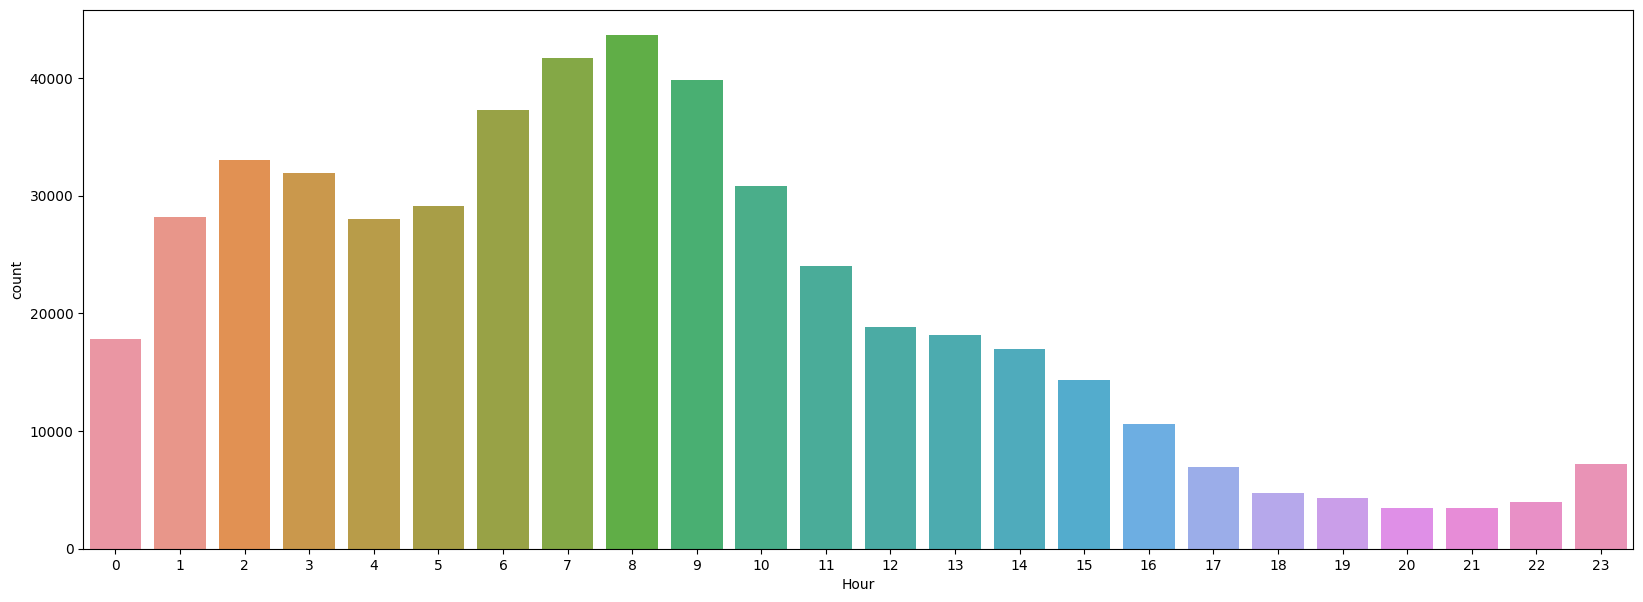

In [148]:
fig = plt.figure(figsize =(20, 7))
sns.countplot(x="Hour",data=EmailData)

In [149]:
#We can Put this data into Beans, for Easy Analysis
bins = [0,4,10,16,21,23]
label =['Night','Morning','AfterNoon','Evening','Night']
EmailData["Hour_periods"] = pd.cut(EmailData["Hour"], bins,labels = label,ordered=False)

<AxesSubplot: >

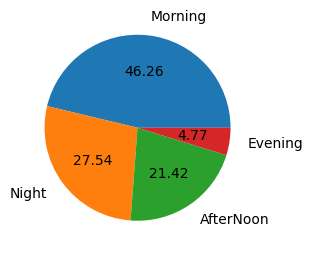

In [150]:
def autopct(pct):
  return ('%.2f' % pct)
fig = plt.figure(figsize =(3,7))
EmailData["Hour_periods"].value_counts().plot(x=None, y=None, kind='pie',pctdistance=0.6,autopct=autopct,labeldistance=1.2,ylabel='') 

In [151]:
np.percentile(EmailData["Hour"],50,axis=0)

8.0

### Observations:
- 25% of the total Emails which are more than 39000 mails, sent from 7 to 9 A.M. in the Morning.
- Maximum Emails are sent at 8 AM
- Least Emails are sent at 9 PM
- More than 50% of the Emails are sent before 8 A.M.
- Number of emails sent tend to decrease after 8 A.M.
- 46% Emails are sent in Morning
- Less than 5% Emails are sent in Evening

**2. Year**

<AxesSubplot: xlabel='Year', ylabel='count'>

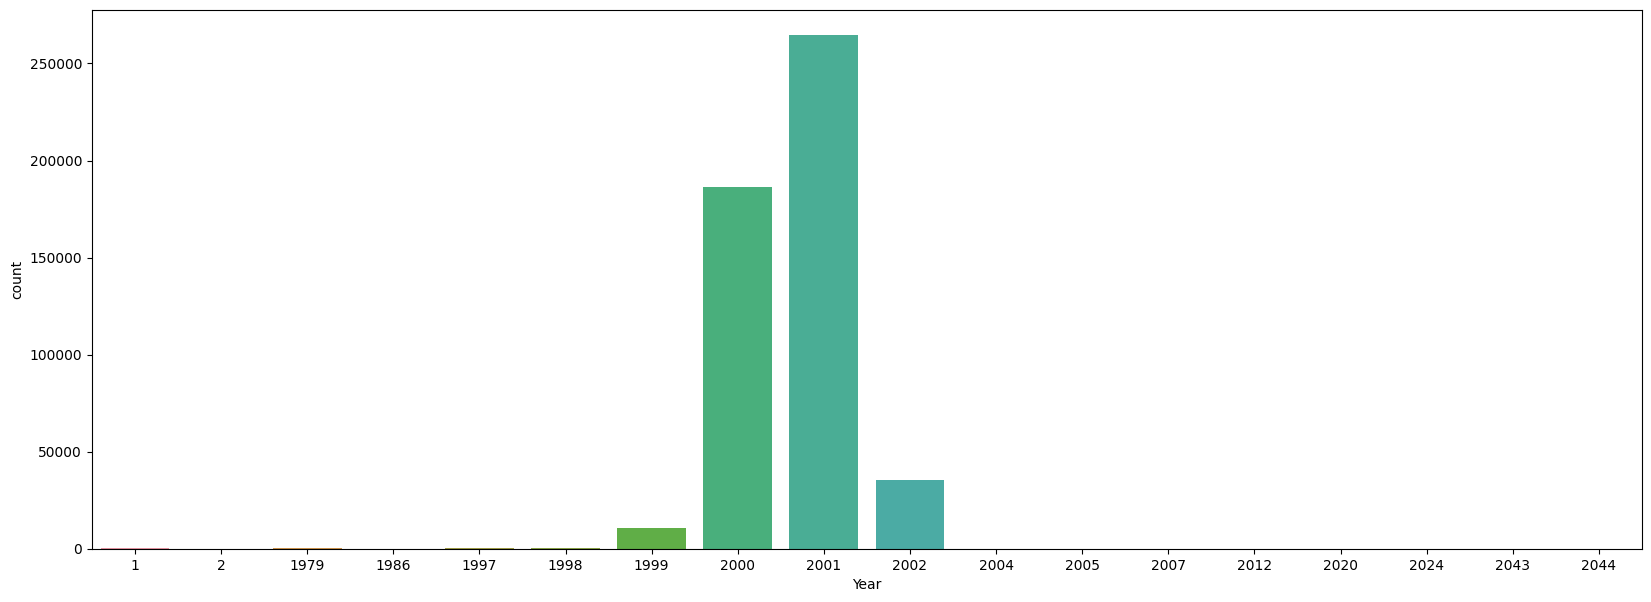

In [152]:
fig = plt.figure(figsize =(20, 7))
sns.countplot(x="Year",data=EmailData)

<AxesSubplot: >

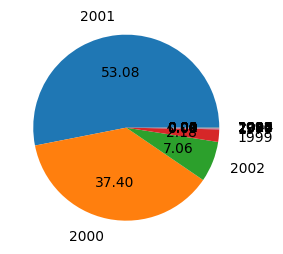

In [153]:
def autopct(pct):
  return ('%.2f' % pct)
fig = plt.figure(figsize =(3,7))
EmailData["Year"].value_counts().plot(x=None, y=None, kind='pie',pctdistance=0.6,autopct=autopct,labeldistance=1.2,ylabel='') 

**OBSERVATION:**
- This Data is collected mostly in the years 2000,2001 and 2002
- Out of which, 53.08% of emails are sent in year 2001
- This would Not be a good field as we have limited data, So deleting it

In [154]:
#Deleting Year

**3. Day**

<AxesSubplot: xlabel='Day', ylabel='count'>

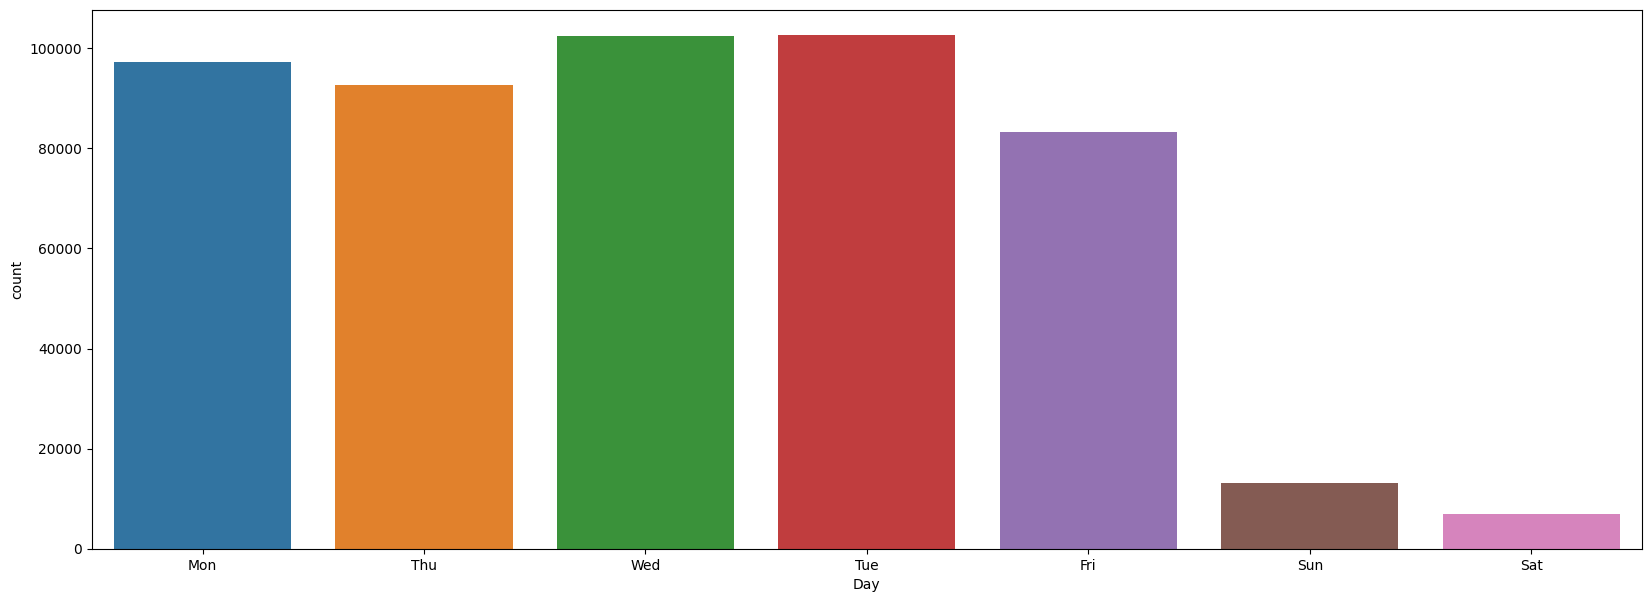

In [155]:
fig = plt.figure(figsize =(20, 7))
sns.countplot(x="Day",data=EmailData)

<AxesSubplot: >

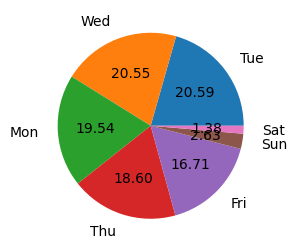

In [156]:
def autopct(pct):
  return ('%.2f' % pct)
fig = plt.figure(figsize =(3,7))
EmailData["Day"].value_counts().plot(x=None, y=None, kind='pie',pctdistance=0.6,autopct=autopct,labeldistance=1.2,ylabel='') 

<AxesSubplot: xlabel='Day', ylabel='count'>

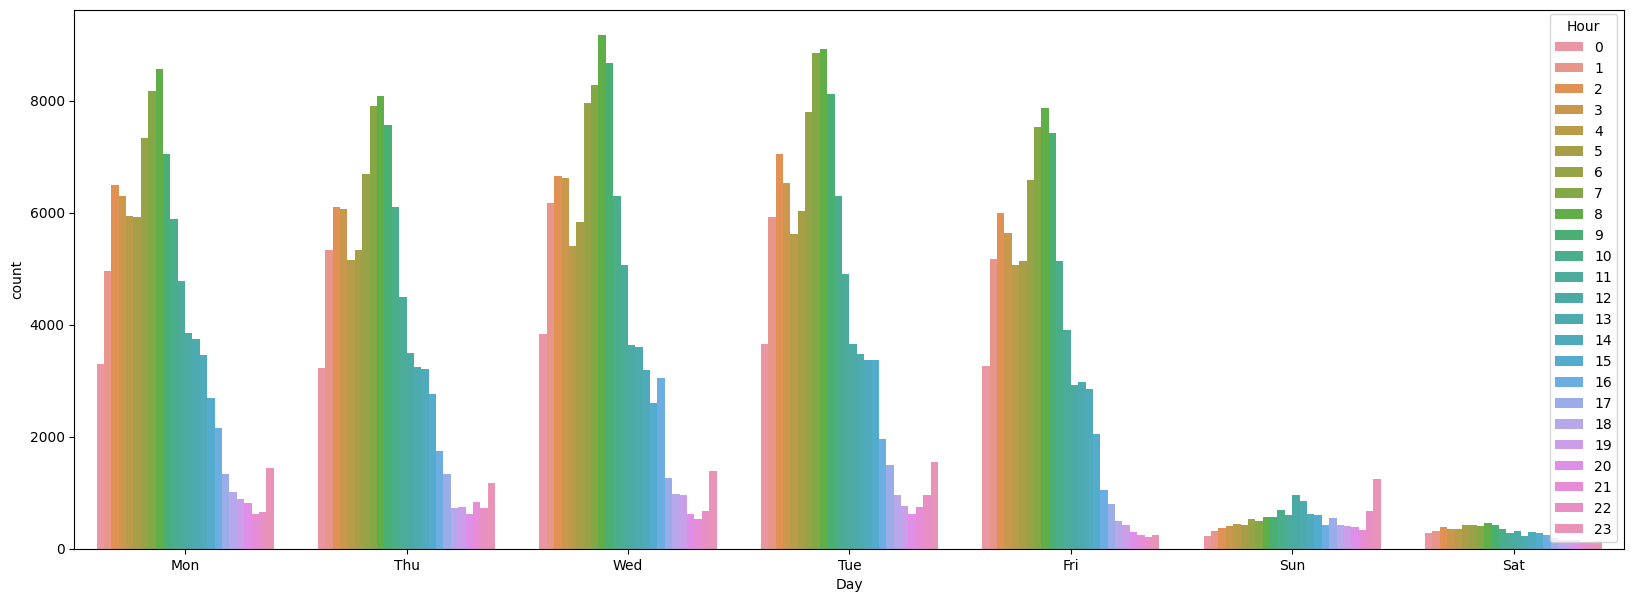

In [157]:
fig = plt.figure(figsize =(20, 7))
sns.countplot(x="Day",data=EmailData,hue='Hour')

**OBSERVATIONS:**
- Least Emails are sent on Saturdays and Sundays, Obviously as there are holidays on Saturday and sunday 
- Most Emails are sent on Tuesday followed by Wed, Mon, Thu and Friday
- Interesting!! Most Emails are sent in Night on Sundays and Saturdays. 

**4. Date**

<AxesSubplot: xlabel='DateNum', ylabel='count'>

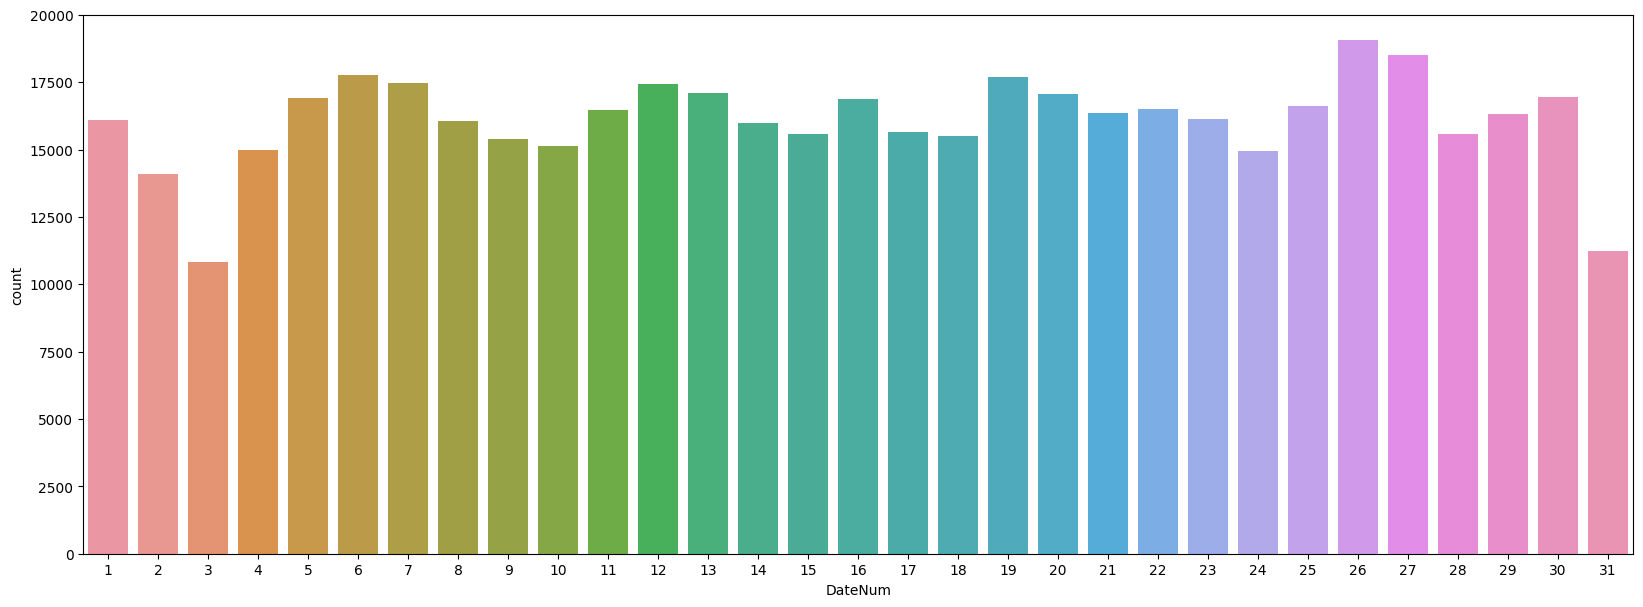

In [158]:
fig = plt.figure(figsize =(20, 7))
sns.countplot(x="DateNum",data=EmailData)

**OBSERVATION:**
- Most Emails are sent on the 26th of Each Month
- Least Emails are sent on 3rd of Each month
- Distribution of data for dates is Partially Flat. Cant Obtain more information from this.
- We can drop this Feature

**5. Month**

<AxesSubplot: xlabel='Month', ylabel='count'>

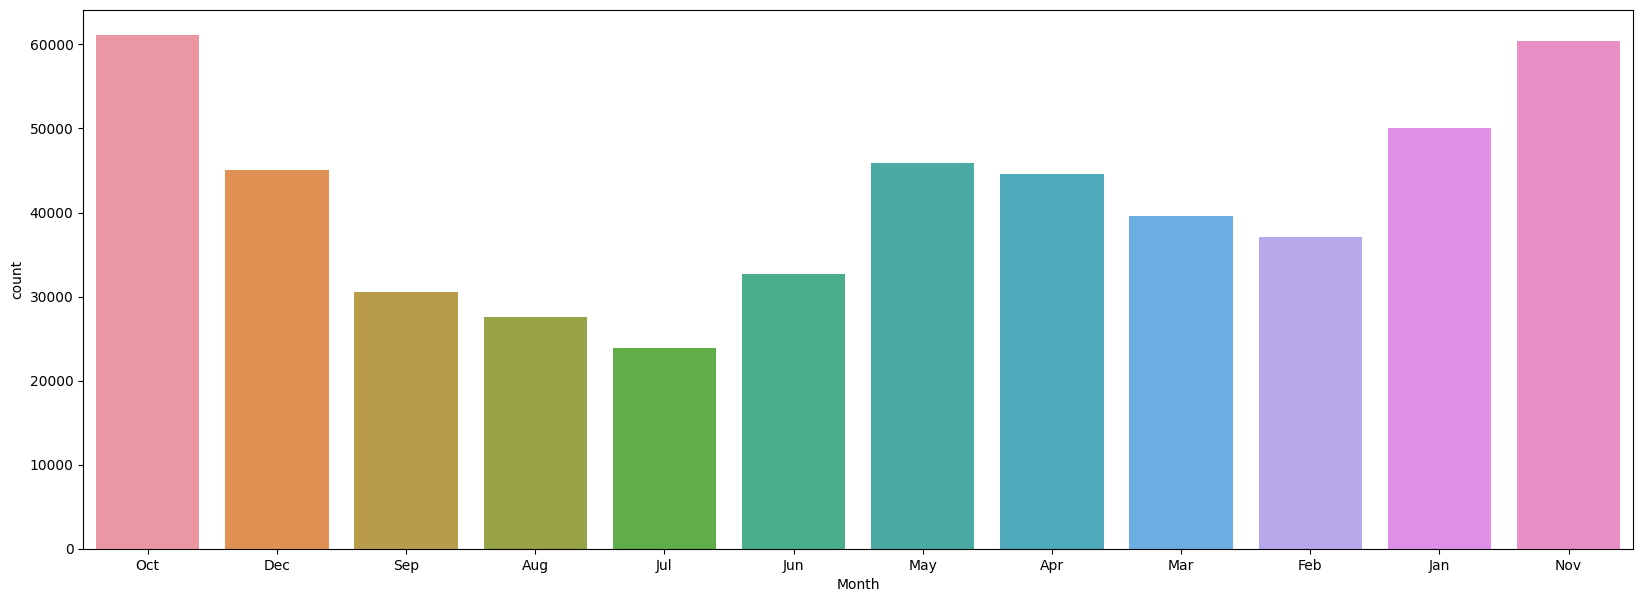

In [159]:
fig = plt.figure(figsize =(20, 7))
sns.countplot(x="Month",data=EmailData)

<AxesSubplot: xlabel='Month', ylabel='count'>

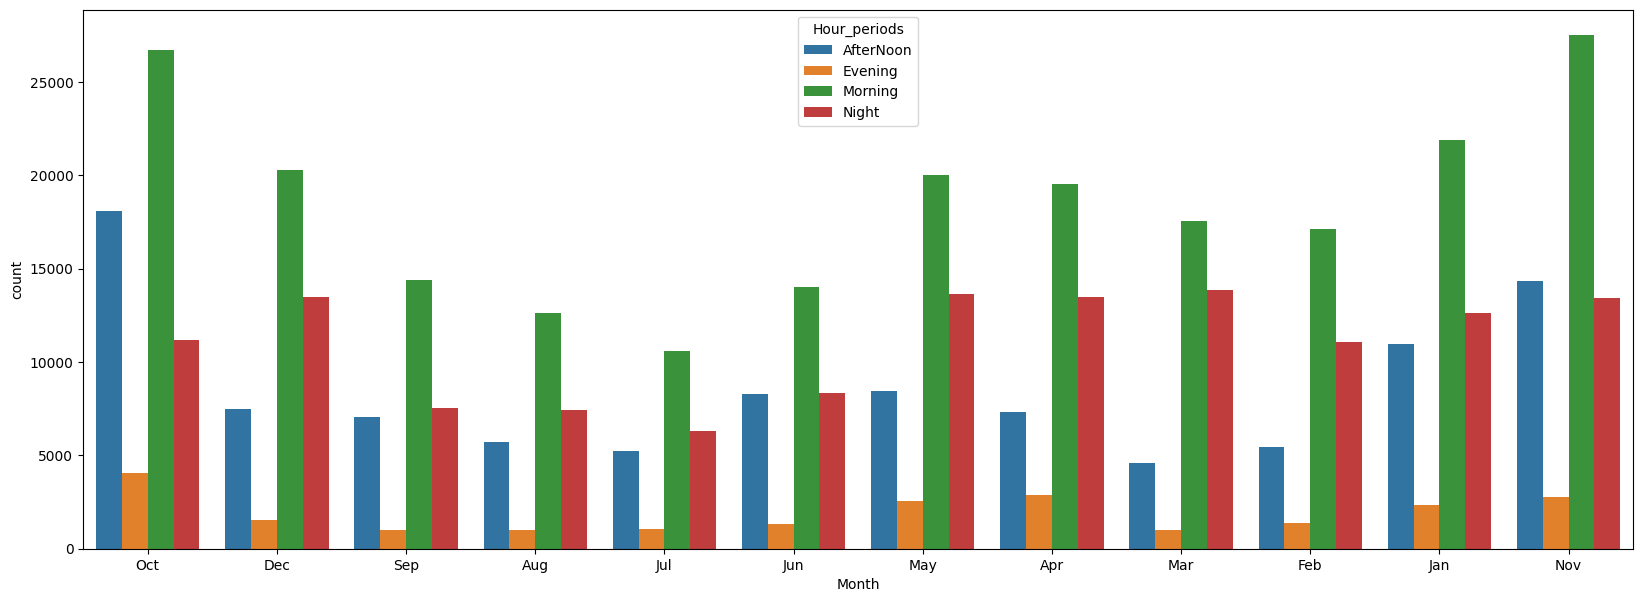

In [160]:
fig = plt.figure(figsize =(20, 7))
sns.countplot(x="Month",data=EmailData,hue='Hour_periods')

<AxesSubplot: xlabel='Month', ylabel='count'>

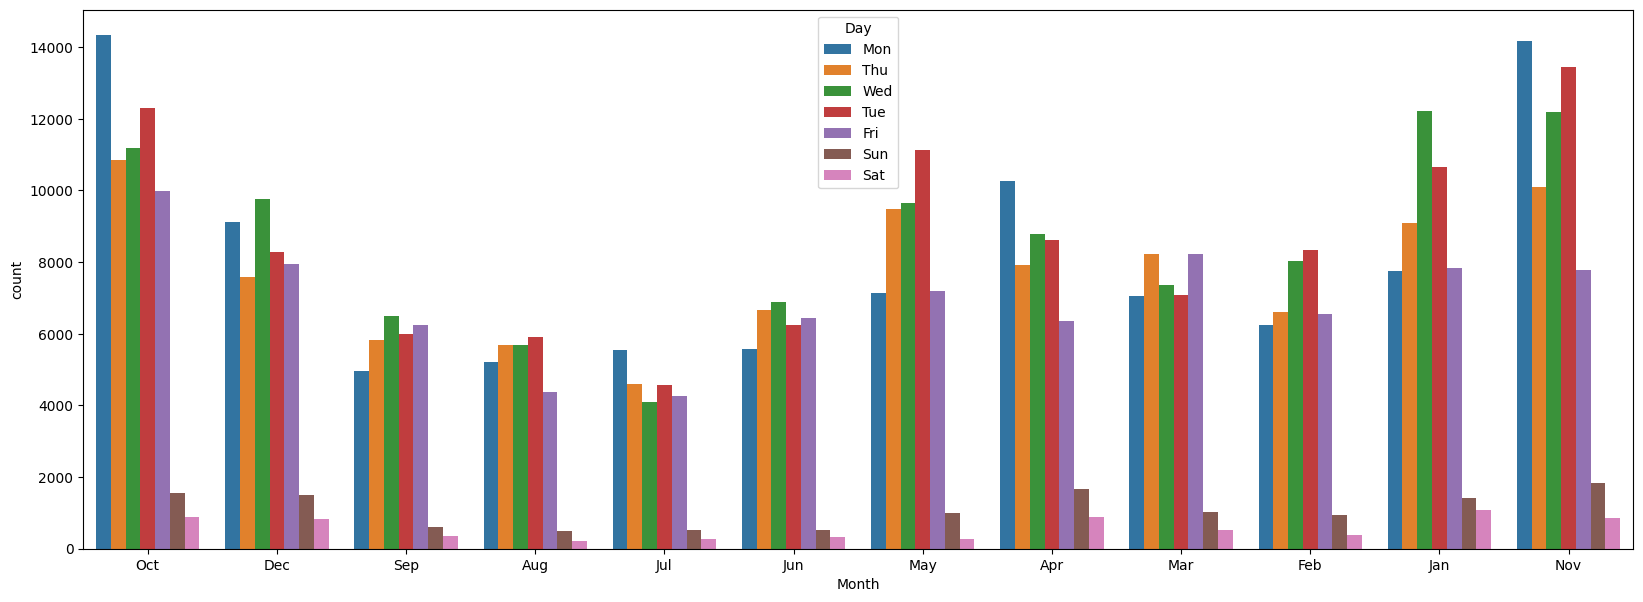

In [161]:
fig = plt.figure(figsize =(20, 7))
sns.countplot(x="Month",data=EmailData,hue='Day')

**OBSERVATION:**
- Least Emails are sent in July
- Most Emails are sent in October and November
- Interestingg!! In October and November Users sent more mails in Afternoon than in Night. For other months its Exactly opposite

EmailData.head(

In [162]:
#Sesons in America 
Seasons = []
for i in EmailData['Month']:
    if i in ['Dec','Jan','Feb']:
        Seasons.append('Winter')
    elif i in ['Mar','Apr','May']:
        Seasons.append('Spring')
    elif i in ['Jun','Jul','Aug']:
        Seasons.append('Summer')
    elif i in ['Sep','Oct','Nov']:
        Seasons.append('Autumn')
        
EmailData['Seasons'] = Seasons
EmailData.head()

,EmailText,Subject,Day,Month,DateNum,Year,Hour,Hour_periods,Seasons
0,Message-ID: <7452188.1075855667684.JavaMail.ev...,Consolidated positions: Issues & To Do list,Mon,Oct,9,2000,7,Morning,Autumn
1,Message-ID: <23790115.1075855667708.JavaMail.e...,Consolidated positions: Issues & To Do list,Mon,Oct,9,2000,7,Morning,Autumn
3,Message-ID: <14670081.1075855667751.JavaMail.e...,Re: 2001 Margin Plan,Thu,Oct,5,2000,5,Morning,Autumn
4,Message-ID: <2101427.1075855667773.JavaMail.ev...,"Var, Reporting and Resources Meeting",Wed,Oct,4,2000,9,Morning,Autumn
5,Message-ID: <19431120.1075855667795.JavaMail.e...,Westgate,Tue,Oct,3,2000,9,Morning,Autumn


In [163]:
len(EmailData[EmailData['Seasons']==''])

0

In [164]:
#As discussed above, dropping unwanted columns
EmailData.drop(['Hour','Year','DateNum','Month'], axis=1, inplace=True)

In [165]:
EmailData.head()

,EmailText,Subject,Day,Hour_periods,Seasons
0,Message-ID: <7452188.1075855667684.JavaMail.ev...,Consolidated positions: Issues & To Do list,Mon,Morning,Autumn
1,Message-ID: <23790115.1075855667708.JavaMail.e...,Consolidated positions: Issues & To Do list,Mon,Morning,Autumn
3,Message-ID: <14670081.1075855667751.JavaMail.e...,Re: 2001 Margin Plan,Thu,Morning,Autumn
4,Message-ID: <2101427.1075855667773.JavaMail.ev...,"Var, Reporting and Resources Meeting",Wed,Morning,Autumn
5,Message-ID: <19431120.1075855667795.JavaMail.e...,Westgate,Tue,Morning,Autumn


In [166]:
EmailData.to_pickle('EmailData_AfterEDA.pkl')